In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Датасет - рейтинги компьютерных игр

Вам нужно построить логистическую регрессию для предсказания рейтинга игры по специальной шкале (будем считать для простоты, что рейтинги закодированы определенным образом). Распределение значений таргета Rating представлено ниже.

In [2]:
df_sales = pd.read_csv('video_games_sales.csv')

#### Распределение таргета

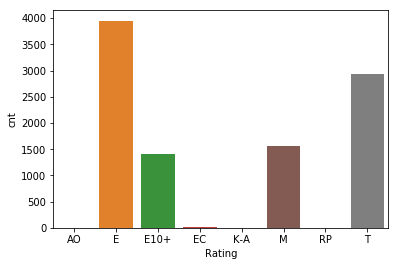

In [3]:
df_sales_gr = df_sales.groupby('Rating').agg({'User_Score': 'count'})
sns.barplot(x='Rating', y='cnt', data=pd.DataFrame(np.concatenate((np.array(df_sales_gr.index).reshape(-1, 1), df_sales_gr.values), axis=1), columns=['Rating', 'cnt']))

In [4]:
df_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df_sales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Задание 1

Определите, какие из признаков в датасете категориальные, порядковые, непрерывные. Выпишите признак и его тип ниже

#### Категориальные: 
Name, Platform, Genre, Publisher, Developer, Rating
#### Порядковые:
Year_of_Release
#### Непрерывные:
NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales, User_Score, User_Count, Critic_Score, Critic_Count

Как распределяются непрерывныеу признаки? Постройте графики их распределений. Проведите тест на нормальность распределения для двух выбранных вами признаков. Какое получилось p-value? Что это значит?

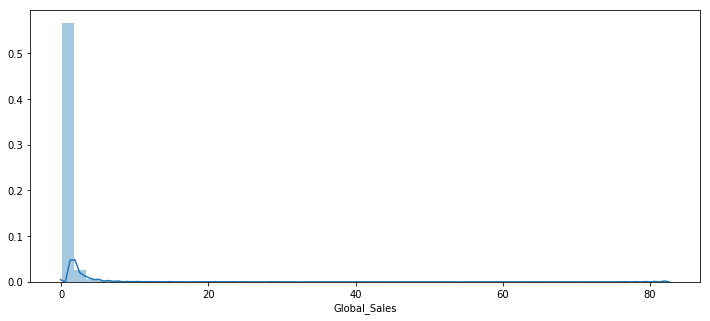

In [7]:
plt.figure(figsize=(12,5))
sns.distplot(df_sales['Global_Sales'])

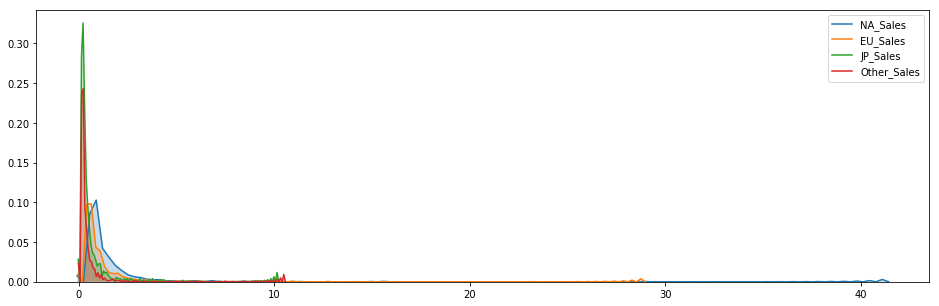

In [8]:
plt.figure(figsize=(16,5))
sns.kdeplot(df_sales['NA_Sales'], shade=True)
sns.kdeplot(df_sales['EU_Sales'], shade=True)
sns.kdeplot(df_sales['JP_Sales'], shade=True)
sns.kdeplot(df_sales['Other_Sales'], shade=True)

Столбец User_Score имеет некорректые значения для их обработки, поэтому заменим "tbd" на NaN

In [9]:
df_sales[df_sales['User_Score'] == 'tbd'].shape

(2425, 16)

In [50]:
df_sales = df_sales.replace('tbd', np.nan)

In [51]:
df_sales[df_sales['User_Score'] == 'tbd'].shape

(0, 16)

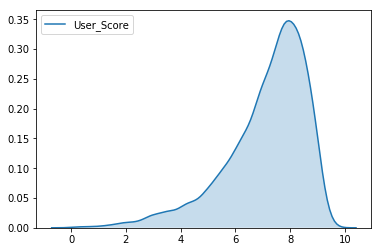

In [53]:
sns.kdeplot(df_sales['User_Score'], shade=True)

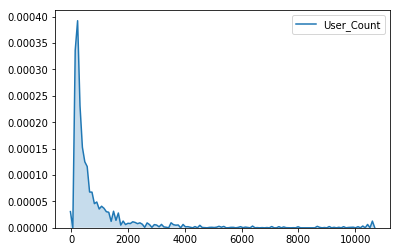

In [13]:
sns.kdeplot(df_sales['User_Count'], shade=True)

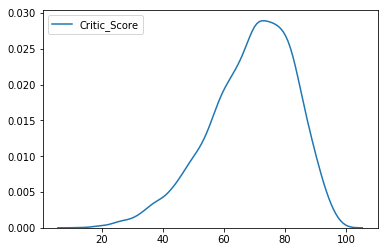

In [14]:
sns.kdeplot(df_sales['Critic_Score'])

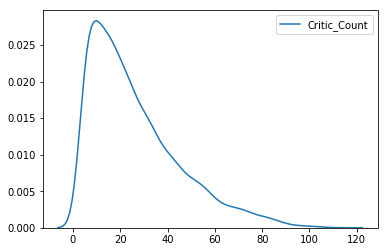

In [15]:
sns.kdeplot(df_sales['Critic_Count'])

In [16]:
from scipy import stats

In [17]:
stats.normaltest(df_sales['NA_Sales'])

NormaltestResult(statistic=35816.697354207376, pvalue=0.0)

In [18]:
stats.normaltest(df_sales['Global_Sales'])

NormaltestResult(statistic=34668.176169688326, pvalue=0.0)

pvalue = 0 означет, что распределение не является нормальным

## Задание 2

1. Как вы можете видеть, некоторые признаки имеют пропуски. Вам необходимо заполнить данные пропуски несколькими различными способами (среднее, медиана, мода). Заодно вспоминаем, что означает каждый из терминов!  
2. Просто выбросите те строки, в которых есть хотя бы одно значение типа NaN. Сколько осталось строк после этого преобразования? Стоит ли применять подобный подход в данном случае?
3. Отдельно прошу подумать над случаями, когда NaN стоит в целевом параметре. Что будете делать с этими строками?

In [19]:
df_sales.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Mean - среднее значение всей выборки

In [20]:
df_sales.fillna(df_sales.mean()).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,NaN,162.229908,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,NaN,162.229908,NaN,NaN


Медина - средний элемент в отсортированной выборке

In [21]:
df_sales.fillna(df_sales.median()).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,21.0,NaN,24.0,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,21.0,NaN,24.0,NaN,NaN


Мода - самое частое значение в столбце. Мода для некоторых столбцов является Nan, поэтому некоторые столбцы остались без изменения

In [22]:
df_sales.fillna(df_sales.mode()).head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_sales.dropna().shape, df_sales.shape

((6825, 16), (16719, 16))

Потеряно более 60% данных, чего делать не стоит

Посчитаем процентное соотношение Nan для каждого столбца

In [24]:
df_sales.isnull().sum(axis = 0) / df_sales.shape[0] * 100 

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         54.602548
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

В целевом значении в датасете пропущено 40% данных. Нельзя построить качественную модель, если значение, которое нам надо предсказать, будет содержать Nan. Чтобы этого избежать, нужно удалить все строки датасета, у которых Rating = Nan

In [208]:
df = df_sales[df_sales['Rating'].notna()]
df = df.drop('Name', axis=1)
df.shape

(9950, 15)

In [209]:
df.Publisher = df.Publisher.dropna

In [210]:
df.isnull().sum(axis = 0) / df.shape[0] * 100 

Platform            0.000000
Year_of_Release     1.819095
Genre               0.000000
Publisher           0.000000
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       19.055276
Critic_Count       19.055276
User_Score         24.582915
User_Count         24.582915
Developer           0.000000
Rating              0.000000
dtype: float64

In [211]:
from sklearn import model_selection

In [212]:
df_train, df_test = model_selection.train_test_split(df, test_size=0.33, random_state=42)

In [213]:
df_train.shape, df_test.shape

((6666, 15), (3284, 15))

In [214]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_test.median())

In [215]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(1653, 793)

In [219]:
df_train['User_Score'] = df_train['User_Score'].astype(float).fillna(df_train['User_Score'].median())
df_test['User_Score'] = df_test['User_Score'].astype(float).fillna(df_test['User_Score'].median())
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)

## Задание 3

Теперь преобразуйте категориальные признаки в такой вид, который можно корректно подать на вход классификатору типа "Логистическая регрессия".

In [220]:
from sklearn import preprocessing

In [221]:
categorical_feature_mask = df_train.dtypes==object
categorical_cols = df_train.columns[categorical_feature_mask].tolist()

In [222]:
categorical_cols

['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

In [223]:
le = preprocessing.LabelEncoder()

## Задание 4

Нормализуйте непрерывные признаки с помощью функции StandardScaler (или RobustScaler, на выбор).
Используя функцию `cross_val_score` модуля `model_selection`, обучите логистическую регрессию. Для функции потерь можно использовать всё тот же `neg_log_loss`

In [ ]:
## Ваш код

## Задание 5

Обучите теперь просто на всем датасете логистическую регрессию разово (без использования `cross_val_score`). Определите по итогам обучения Логистической регрессии, какие из признаков являются самыми важными, а какие менее важными. Постройте график важности признаков (как строили на уроке).

In [ ]:
## Ваш код

## Интересные ссылки (для тех, кто хочет знать еще больше!)

Приведу вам парочку просто интересных ссылок (которые, впрочем, расширяют кругозор знаний, но вряд ли помогут с выполнением домашки):
https://github.com/alicezheng/feature-engineering-book/blob/master/07.00_Swiss_roll.ipynb
https://habr.com/ru/company/mailru/blog/346942/